In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
"""
from matplotlib import font_manager, rc
import matplotlib as mpl
font_path = '../data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
9:30
생필품 농수축산물 가격 정보(2021년1월_6월).csv
"""

In [103]:
import platform 

# 운영체제 확인 
system = platform.system()

# 한글폰트 설정 

if system == 'Darwin': # mac-os
  plt.rc('font', family = 'AppleGothic')
elif system == 'Windows': #windos os 
  plt.rc('font', family = 'NanumGothic')
else: # linux
  plt.rc('font', family = 'NanumGothic')
  
# 마이너스 기호(-) 깨짐 방지 
plt.rc('axes', unicode_minus=False)
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
raw = pd.read_csv('csv_file/생필품 농수축산물 가격 정보(2021년1월_6월).csv', encoding='cp949')

In [11]:
df = raw.copy()

In [23]:
df.head(2)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24


In [21]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [24]:
df.isnull().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

In [25]:
# 자료형 확인
df.dtypes

일련번호                  int64
시장/마트 번호              int64
시장/마트 이름             object
품목 번호                 int64
품목 이름                object
실판매규격                object
가격(원)                 int64
년도-월                 object
비고                   object
시장유형 구분(시장/마트) 코드     int64
시장유형 구분(시장/마트) 이름    object
자치구 코드                int64
자치구 이름               object
점검일자                 object
dtype: object

In [26]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [27]:
# 데이터 확인

# 컬럼별(속성정보) 데이터 확인
df['시장/마트 번호']

0          2
1        228
2          1
3         25
4          6
        ... 
42694    226
42695    226
42696    226
42697    226
42698    226
Name: 시장/마트 번호, Length: 42699, dtype: int64

In [29]:
# nunique : number of unique

df['시장/마트 번호'].nunique()

102

In [30]:
# 시장/ 마트 목록
df['시장/마트 이름']

0          신세계백화점
1          방배종합시장
2            통인시장
3        방학동도깨비시장
4         이마트 용산점
           ...   
42694    롯데마트 구로점
42695    롯데마트 구로점
42696    롯데마트 구로점
42697    롯데마트 구로점
42698    롯데마트 구로점
Name: 시장/마트 이름, Length: 42699, dtype: object

In [31]:
df['시장/마트 이름'].nunique()

102

In [32]:
# 시장/마트 목록
# >> 중복 데이터 여부 확인 : 겹치는게 있나 ??
# >> 겹치는 게 있다면 >> drop_duplicates()
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [33]:
df[['시장/마트 번호', '시장/마트 이름','자치구 이름','시장유형 구분(시장/마트) 이름']]

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
1,228,방배종합시장,서초구,전통시장
2,1,통인시장,종로구,전통시장
3,25,방학동도깨비시장,도봉구,전통시장
4,6,이마트 용산점,용산구,대형마트
...,...,...,...,...
42694,226,롯데마트 구로점,구로구,대형마트
42695,226,롯데마트 구로점,구로구,대형마트
42696,226,롯데마트 구로점,구로구,대형마트
42697,226,롯데마트 구로점,구로구,대형마트


In [34]:
df_market = \
    df[['시장/마트 번호', '시장/마트 이름','자치구 이름','시장유형 구분(시장/마트) 이름']].drop_duplicates()

In [35]:
# 자치구별 시장/마트 개수

df_market.head()

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
1,228,방배종합시장,서초구,전통시장
2,1,통인시장,종로구,전통시장
3,25,방학동도깨비시장,도봉구,전통시장
4,6,이마트 용산점,용산구,대형마트


In [40]:
df_market['자치구 이름'].value_counts()

자치구 이름
중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: count, dtype: int64

In [44]:
condition = df_market['자치구 이름'] == '구로구'

In [45]:
df_market[condition]

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
15,109,고척근린시장,구로구,전통시장
298,108,남구로시장,구로구,전통시장
766,110,이마트 신도림점,구로구,대형마트
6609,227,NC백화점 신구로점,구로구,대형마트
42682,226,롯데마트 구로점,구로구,대형마트


In [46]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [50]:
df_items = df[[ '품목 번호', '품목 이름']].drop_duplicates()

In [52]:
df_items = df_items.sort_values('품목 이름')

In [53]:
# 품목 이름 확인(30개씩 확인)
df_items[:30]

,품목 번호,품목 이름
222,13,고등어
135,304,고등어
15781,316,"고등어(30cm,국산)"
1550,318,"고등어(30cm,수입산)"
3,268,"고등어(냉동,국산)"
4834,269,"고등어(냉동,수입산)"
2,266,"고등어(생물,국산)"
1341,267,"고등어(생물,수입산)"
3984,314,"냉동참조기(20cm,국산)"
3706,313,"냉동참조기(20cm,수입)"


In [55]:
df_items[60:]

,품목 번호,품목 이름
10,309,양파(1.5kg망)
2191,272,양파(작은망)
5,22,오이
21,311,오이(다다기)
31,253,오징어
2620,54,오징어(냉동)
441,256,"오징어(냉동,국산)"
6813,257,"오징어(냉동,수입산)"
36,254,"오징어(생물,국산)"
2567,255,"오징어(생물,수입산)"


In [56]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [59]:
df_gu = df[['자치구 코드',
       '자치구 이름']].drop_duplicates()

In [60]:
df_gu.shape

(25, 2)

In [61]:
df_gu.head()

,자치구 코드,자치구 이름
0,140000,중구
1,650000,서초구
2,110000,종로구
3,320000,도봉구
4,170000,용산구


In [62]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [63]:
# 시장유향
df[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']]

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장
2,1,전통시장
3,1,전통시장
4,2,대형마트
...,...,...
42694,2,대형마트
42695,2,대형마트
42696,2,대형마트
42697,2,대형마트


In [65]:
df_gubun = df[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']].drop_duplicates()

In [66]:
# 삼겹살 가격 분석
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [73]:
condition = \
    (df['품목 이름'].str.contains('삼겹살')) & (df['년도-월'] == '2021-06')
# str.contains : 문자 중에 '삼겹살'이 포함되어 있는 거 출력해줘

In [75]:
df[condition].head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
34,1667081,10,용문시장,99,돼지고기(생삼겹살),100g,2600,2021-06,대전한돈,1,전통시장,170000,용산구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24


In [76]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [77]:
condition = \
    (df['품목 이름'].str.contains('삼겹살')) & (df['년도-월'] == '2021-06') &\
    (df['실판매규격'].str.contains('600'))

In [78]:
df[condition]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,1668261,100,홈플러스 중계점,99,돼지고기(생삼겹살),600g,22140,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
6514,1674124,40,홈플러스 등촌점,99,돼지고기(생삼겹살),600g,14940,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,도드람,2,대형마트,290000,성북구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24


In [79]:
df_sam = df[condition]

In [81]:
df_sam.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24


In [82]:
# 삼겹살 600g 평균 가격은 ?
df_sam['가격(원)'].mean()

16842.723214285714

In [83]:
# 삼겹살 600g 최고 가격은 ?
df_sam['가격(원)'].max()

35890

In [84]:
# 삼겹살 600g 최저 가격은 ?
df_sam['가격(원)'].min()

1690

In [85]:
# 가장 비싼곳이 어디야 ?
df_sam[df_sam['가격(원)'] == 35890]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4043,1668108,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,35890,2021-06,국내산,2,대형마트,710000,송파구,2021-06-24
4064,1674531,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,35890,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24


In [86]:
# 어떻게 저렇게 싸지 ?
df_sam[df_sam['가격(원)'] == 1690]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


In [87]:
df_sam[df_sam['가격(원)'] < 5000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
3645,1667404,27,이마트 창동점,99,돼지고기(생삼겹살),600g,2720,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


### 우리 동네 삼겹살 가격

In [108]:
gu = input('당신이 사는 구 이름은 ?')

In [109]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [110]:
condition = (df_sam['자치구 이름'] == gu)

In [111]:
df_sam[condition]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
2689,1670184,25,방학동도깨비시장,99,돼지고기(생삼겹살),600g,13800,2021-06,국내산 한돈,1,전통시장,320000,도봉구,2021-06-24
2698,1671109,25,방학동도깨비시장,99,돼지고기(생삼겹살),600g,12000,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
2719,1673750,25,방학동도깨비시장,99,돼지고기(생삼겹살),600g,12000,2021-06,국내산 한돈,1,전통시장,320000,도봉구,2021-06-24
2741,1667387,25,방학동도깨비시장,99,돼지고기(생삼겹살),600g,12000,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
3100,1667421,26,신창시장,99,돼지고기(생삼겹살),600g,13980,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
3188,1671143,26,신창시장,99,돼지고기(생삼겹살),600g,15180,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
3196,1673784,26,신창시장,99,돼지고기(생삼겹살),600g,15180,2021-06,국내산 도드람,1,전통시장,320000,도봉구,2021-06-24
3205,1670218,26,신창시장,99,돼지고기(생삼겹살),600g,12500,2021-06,국내산 도드람,1,전통시장,320000,도봉구,2021-06-24
3593,1673767,27,이마트 창동점,99,돼지고기(생삼겹살),600g,14100,2021-06,국내산 도드람,2,대형마트,320000,도봉구,2021-06-24
3603,1670201,27,이마트 창동점,99,돼지고기(생삼겹살),600g,18600,2021-06,국내산 도드람,2,대형마트,320000,도봉구,2021-06-24


In [112]:
df_sam_gu = df_sam[condition][['시장/마트 이름', '품목 이름','실판매규격', '가격(원)']]

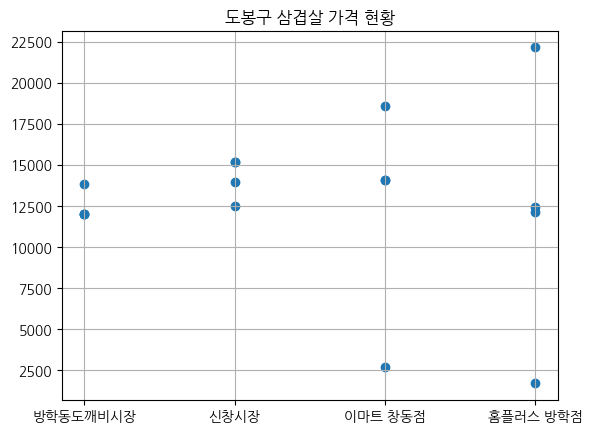

In [113]:
# 데이터 시각화
x = df_sam_gu['시장/마트 이름']
y = df_sam_gu['가격(원)']

plt.scatter(x,y)
plt.title(gu +' 삼겹살 가격 현황')
plt.grid()
plt.show()

### 마트 지점별 삼겹살 가격

In [114]:
df_sam.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24


In [130]:
mart = input('시장/마트 이름 : ')

In [131]:
# 마트 지점별 삼겹살 가격
df_sam_mart = df_sam[df_sam['시장/마트 이름'].str.contains(mart)]

In [132]:
df_sam_mart.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [133]:
df_sam_mart[['시장/마트 이름','품목 번호', '품목 이름', '실판매규격', '가격(원)']]

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원)
76,이마트 가양점,99,돼지고기(생삼겹살),600g,15480
86,이마트 가양점,99,돼지고기(생삼겹살),600g,14880
146,이마트 가양점,99,돼지고기(생삼겹살),600g,14880
325,이마트 성수점,202,돼지고기(생삼겹살),600g,15480
459,이마트 자양점,99,돼지고기(생삼겹살),600g,14880
745,이마트 자양점,99,돼지고기(생삼겹살),600g,22080
1021,이마트 가양점,99,돼지고기(생삼겹살),600g,14100
3436,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14880
3461,이마트 왕십리점,202,돼지고기(생삼겹살),600g,15480
3477,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14100


In [134]:
len(df_sam_mart[['시장/마트 이름','품목 번호', '품목 이름', '실판매규격', '가격(원)']])

28

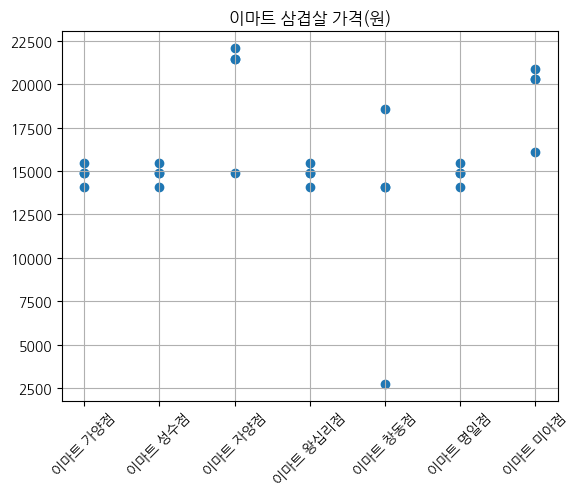

In [135]:
# 시각화
x=df_sam_mart['시장/마트 이름']
y=df_sam_mart['가격(원)']

plt.scatter(x,y)
plt.grid()
plt.title(mart + ' 삼겹살 가격(원)')
plt.xticks(rotation= 45)

plt.show()

In [136]:
# In-class Practice

# 미션 : 달걀 가격 분석
# 조건 : 포함 달걀 : 달걀, 30개(실판매규격)

In [139]:
df.head(3)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24


In [182]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [276]:
# 포함되어야 하는 조건 : 달걀, 실판매규격 : 30개
condition = (df['품목 이름'].str.contains('달걀')) & (df['실판매규격'].str.contains('30개')) & (df['가격(원)'] > 0)

In [277]:
# 조건
df_egg = df[condition]

In [278]:
# 원하는 컬럼만 선택 겸 중복 제거
df_egg_dup = df_egg[['시장/마트 이름','품목 번호', '품목 이름', '실판매규격', '가격(원)']].drop_duplicates()

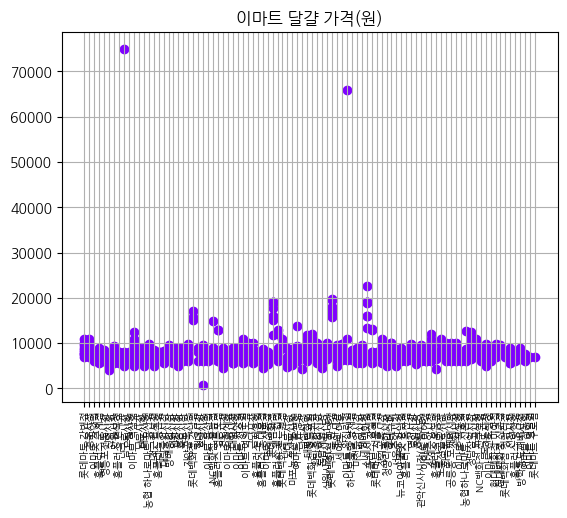

In [279]:
# 시각화
x=df_egg_dup['시장/마트 이름']
y=df_egg_dup['가격(원)']

plt.scatter(x,y, color = '#7f00ff')
plt.grid()
plt.title(mart + ' 달걀 가격(원)')
plt.xticks(fontsize=7,rotation= 90)

plt.show()

In [281]:
df_egg_dup.describe()

,품목 번호,가격(원)
count,790.000000,790.000000
mean,317.700000,8313.303797
std,26.322459,3945.248419
min,17.000000,800.000000
25%,320.000000,6950.000000
50%,320.000000,7795.000000
75%,320.000000,8900.000000
max,321.000000,75000.000000


### 우리 동네 달걀 가격

In [283]:
gu = input('어디 구? ')

In [ ]:
# 포함되어야 하는 조건 : 달걀, 실판매규격 : 30개
condition = (df['품목 이름'].str.contains('달걀')) & (df['실판매규격'].str.contains('30개')) & (df['가격(원)'] > 0)

In [ ]:
# 조건
df_egg = df[condition]

In [287]:
df_egg.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [289]:
df_egg_gu = df_egg[df_egg['자치구 이름'] == gu][['시장/마트 이름', '품목 이름', '실판매규격', '가격(원)']]

In [290]:
df_egg_gu = df_egg_gu.sort_values('가격(원)')

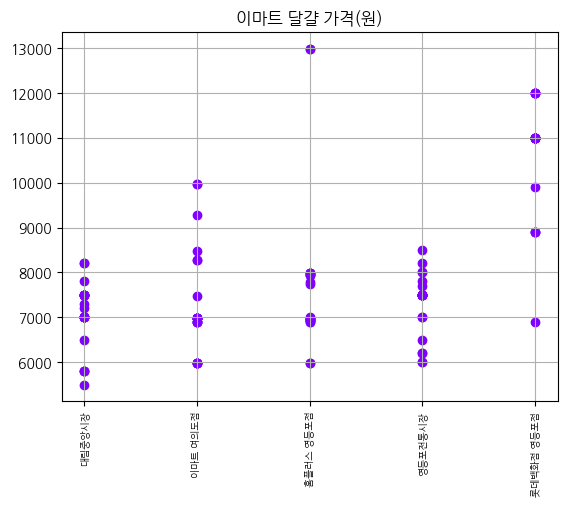

In [291]:
# 시각화
x=df_egg_gu['시장/마트 이름']
y=df_egg_gu['가격(원)']

plt.scatter(x,y, color = '#7f00ff')
plt.grid()
plt.title(mart + ' 달걀 가격(원)')
plt.xticks(fontsize=7,rotation= 90)

plt.show()

In [304]:
df_egg_gu.describe()

,가격(원)
count,120.000000
mean,8059.500000
std,1810.716396
min,5500.000000
25%,6980.000000
50%,7500.000000
75%,8485.000000
max,12990.000000


In [307]:
# 마트 지점별 달걀 가격

mart_branch = input('마트 이름 : ')

In [308]:
mart_branch

'이마트'

In [309]:
df_egg.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [314]:
# 마트 지점별 달걀 가격
df_egg_branch = df_egg[df_egg['시장/마트 이름'].str.contains(mart_branch)]

In [315]:
df_egg_branch.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [318]:
df_egg_branch_mod = df_egg_branch[[ '시장/마트 이름','품목 이름', '실판매규격', '가격(원)']].drop_duplicates()

In [320]:
df_egg_branch_mod['가격(원)'].mean()

7991.563025210084

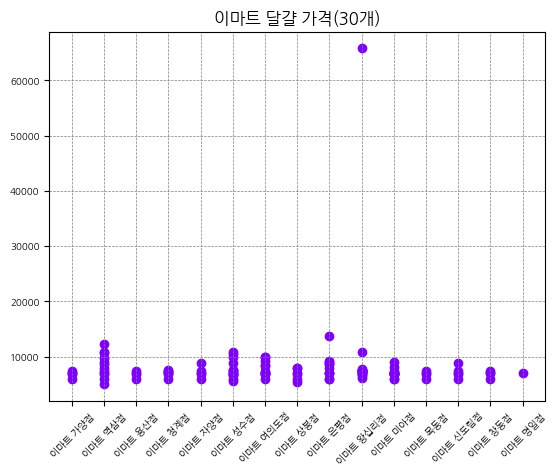

In [334]:
# 시각화
x=df_egg_branch_mod['시장/마트 이름']
y=df_egg_branch_mod['가격(원)']

plt.scatter(x,y, color = '#7f00ff')
plt.grid(axis='both', linestyle='--', color='gray', linewidth=0.5)
plt.title(mart_branch + ' 달걀 가격(30개)')
plt.xticks(fontsize=7,rotation= 45)
plt.yticks(fontsize=7)

plt.show()

In [327]:
df_egg_branch_mod['실판매규격'].unique()

array(['30개(1800g)', '30개', '30개 ', '30개(1.56kg)', '30개(1560g)',
       '30개(1.8kg)', '30개(특란)', '30개((1.8kg)', '30개(1,800g)',
       '30개 (1,800g)', '30개(1,560g)', '30개 1.8kg', '30개(1.68kg)',
       '30개 (1,800원)'], dtype=object)

In [ ]:
# 변수 정리
# 기준 >> 함수